{'cachegen_no_violation_rate': [30, 40, 60], 'cachegen_no_quality': [0.94, 1, 1], 'cachegen_violation_rate': [20], 'cachegen_quality': [1], 'text_violation_rate': [17], 'text_quality': [1], 'quant_violation_rate': [50, 60, 100], 'quant_quality': [0.63, 0.9, 1]}
{'cachegen_no_violation_rate': [20, 40, 50], 'cachegen_no_quality': [0.94, 1, 1], 'cachegen_violation_rate': [0], 'cachegen_quality': [1], 'text_violation_rate': [17], 'text_quality': [1], 'quant_violation_rate': [40, 50, 80], 'quant_quality': [0.63, 0.9, 1]}


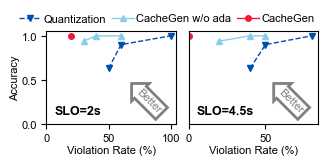

In [13]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.axisartist.axislines import SubplotZero
import json
from io import StringIO
import pandas as pd

fontsize = 8
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = fontsize
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['lines.linewidth']=1
plt.rcParams['lines.markersize']=4

CYAN_LINE = "#00cccc"
CYAN = "cyan"
ORANGE_LINE = "#F2AA3C"
ORANGE = "orange"
GREEN = "#0BEF48"
BLUE = "blue"
PURPLE = "#B682F8"
colors = [
    '#004DAF',
    '#ED1B3A',
    '#FF9900',
    '#33A02C',
    '#FABEAF',
    '#AAD59B',
    '#FC5A50',
    "#008080",
    "#0000FF",
    "#808000",
    "#800080"
]
SYS_COLOR = colors[1]
WORSE_BASELINE_COLOR = colors[0]
BETTER_BASELINE_COLOR = colors[0]

def plot(csv, ax, title, xlabel, type,
                      need_y_label=False, need_legend=-1):

    data = json.load(open(csv))
    print(data)
    lines = []
    lines.append(ax.plot(data[f'quant_{type}'], data['quant_quality'], c=BETTER_BASELINE_COLOR, marker="v",  label="Quantization", ls="--"))
    lines.append(ax.plot(data[f'cachegen_no_{type}'], data[f'cachegen_no_quality'], marker="^", c="skyblue", label="CacheGen w/o ada"))
    lines.append(ax.plot(data[f'cachegen_{type}'], data[f'cachegen_quality'], marker="o", c=SYS_COLOR, label="CacheGen"))

    ax.set_xlim(left=0)
    # ax.set_title(title, fontsize=fontsize)
    ax.set_ylim(bottom=0, top=1.05)
    ax.set_yticks([])
    ax.set_ylabel("")
    if need_y_label:
        ax.set_ylabel("Accuracy",
                      fontsize=fontsize, labelpad=1)
        ax.set_yticks([0, 0.5, 1], fontsize=fontsize)

    if need_legend >= 0:
        ax.legend(loc="upper right", frameon=False,
                  bbox_to_anchor=[2.15, 1.3], ncol=3, handletextpad=0.2,
                  columnspacing=0.5
        )

    ax.text(0.06, 0.1, title, c='black', transform=ax.transAxes, fontsize=fontsize + 1, weight="bold")
    ax.set_xlabel(xlabel, labelpad=1)

fig, axes = plt.subplots(1, 2, figsize=(3.5, 1.2))
plt.subplots_adjust(wspace=0.1, hspace=0.5)

cur_type = "violation_rate"
plot('slo1.json', axes[0], "SLO=2s", "Violation Rate (%)", type=cur_type, 
     need_y_label=True, need_legend=True)
plot('slo2.json', axes[1], "SLO=4.5s", "Violation Rate (%)", type=cur_type)


for ax in axes:
	bbox_props = dict(boxstyle="larrow", fc=(1,1,1), ec="grey", lw=2)
	t = ax.text(0.9, 0.1, "Better", ha="right", 
				va="bottom", rotation=-45, bbox=bbox_props, c='grey',
				transform=ax.transAxes)
fig.savefig("fig-adaptation-res.pdf", bbox_inches="tight", transparent=True)